# Smart Beta and Factor Investing

This assignment refers to the HBS case: **Smart Beta Exchange-Traded-Funds and Factor Investing**.

* The case is a good introduction to important pricing factors.
* It also gives useful introduction and context to ETFs, passive vs active investing, and so-called “smart beta” funds.

# 1. READING

1. Describe how each of the factors (other than MKT) is measured.1That is, each factor is a portfolio of stocks–which stocks are included in the factor portfolio?

1. Is the factor portfolio...
    * long-only
    * long-short
    * value-weighted
    * equally-weighted

1. What steps are taken in the factor construction to try to reduce the correlation between the factors?
5. What is the point of figures 1-6?
6. How is a “smart beta” ETF different from a traditional ETF?
7. Is it possible for all investors to have exposure to the “value” factor?
8. How does factor investing differ from traditional diversification?

#### Footnote:

If you need more info in how these factor portfolios are created, see Ken French’s website, and the follow- details: 

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_mom_factor.html

***

# 2. The Factors

### Data
Use the data found in `data/factor_pricing_data.xlsx`.

Factors: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.

* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.

* The sheet also contains data on five additional factors.

* All factor data is already provided as excess returns

### 1. 
Analyze the factors, similar to how you analyzed the three Fama-French factors in `Homework 4`.

You now have three additional factors, so let’s compare there univariate statistics. 

* mean
* volatility    
* Sharpe

In [12]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [13]:
#Question 1
path='C:/Users/gonza/Documents/UChicago/Quarters/Fall I/FINM 36700 - Portfolio and Risk Mangement/Homeworks/HW4-6/data/factor_pricing_data_monthly.xlsx'
sheet='factors (excess returns)'
data_frame=pd.read_excel(path, sheet)

base=data_frame.copy()
base['Date']=pd.to_datetime(base['Date'], errors='coerce')

#calculating statistics
def calc_summary_statistics(
        returns: pd.DataFrame,
        annual_factor: int=12,
) -> pd.DataFrame:
    """
    Calculate summary statistics for a time series of returns
    """
    #uploading the database
    returns = returns.copy()
    returns = returns.drop(labels='Date', axis=1)
    summary_statistics = pd.DataFrame(index=returns.columns)

    #calculating basic statistics
    summary_statistics['Mean'] = returns.mean()
    summary_statistics['Annualized Mean'] = returns.mean() * annual_factor
    summary_statistics['Vol'] = returns.std()
    summary_statistics['Annualized Vol'] = returns.std() * np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = returns.mean() / returns.std()
    summary_statistics['Annualized Sharpe'] = summary_statistics['Sharpe'] * np.sqrt(annual_factor)

    return summary_statistics

summary_1=calc_summary_statistics(base)

#printing 
summary_1


,Mean,Annualized Mean,Vol,Annualized Vol,Sharpe,Annualized Sharpe
MKT,0.007296,0.087552,0.045074,0.156142,0.161865,0.560718
SMB,0.000510,0.006120,0.029235,0.101274,0.017446,0.060435
HML,0.002170,0.026039,0.031418,0.108835,0.069065,0.239249
RMW,0.003671,0.044047,0.023940,0.082931,0.153325,0.531132
CMA,0.002357,0.028288,0.020923,0.072480,0.112665,0.390284
UMD,0.005026,0.060313,0.044269,0.153352,0.113536,0.393299


### 2. 

Based on the factor statistics above, answer the following.
* Does each factor have a positive risk premium (positive expected excess return)? 
* How have the factors performed since the time of the case, (2015-present)?

### 3. 

Report the correlation matrix across the six factors.
* Does the construction method succeed in keeping correlations small?
* Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

### 4. 

Report the tangency weights for a portfolio of these 6 factors.
* Which factors seem most important? And Least?
* Are the factors with low mean returns still useful?
* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

What do you conclude about the importance or unimportance of these styles?

In [14]:
#Question 2
#summary after 2015
date=base['Date']
m1 = date.dt.year >= 2015
subset_1=base.loc[m1]

summary_2=calc_summary_statistics(subset_1)

#printing 
summary_2

,Mean,Annualized Mean,Vol,Annualized Vol,Sharpe,Annualized Sharpe
MKT,0.009823,0.117872,0.045425,0.157356,0.216240,0.749078
SMB,-0.001981,-0.023775,0.029781,0.103166,-0.066527,-0.230455
HML,-0.001359,-0.016303,0.037494,0.129885,-0.036234,-0.125520
RMW,0.003334,0.040012,0.020967,0.072632,0.159030,0.550896
CMA,-0.000762,-0.009141,0.023692,0.082072,-0.032151,-0.111373
UMD,0.001677,0.020119,0.039660,0.137387,0.042273,0.146438


-Yes, all six factors have positive risk premium when we consider the entirety of the database.

-Since 2015 the MKT, RMW and UMD have done well with positive returns. However, the factors SMB, HML and CMA have negative average returns fot his time period. 

The highest correlation (67.67%) is between CMA and HML
The lowest correlation (-41.19%) is between RMW and SMB


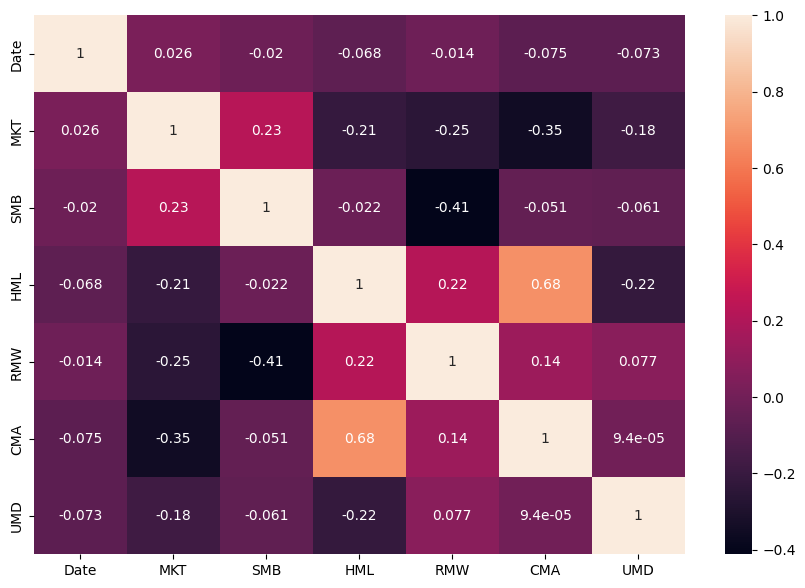

In [15]:
#Question 3
base_correlations=data_frame.copy()
correlation_matrix = base_correlations.corr()

matrix_size=7
fig, ax = plt.subplots(figsize=(matrix_size * 1.5, matrix_size))
heatmap = sns.heatmap(
    correlation_matrix, 
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    annot=True,
    )
    
highest_lowest_corr = (
    correlation_matrix
    .unstack()
    .sort_values()
    .reset_index()
    .set_axis(['asset_1', 'asset_2', 'corr'], axis=1)
    .loc[lambda df: df.asset_1 != df.asset_2]
    )
    
highest_corr = highest_lowest_corr.iloc[lambda df: len(df)-1, :]
lowest_corr = highest_lowest_corr.iloc[0, :]
print(f'The highest correlation ({highest_corr["corr"]:.2%}) is between {highest_corr.asset_1} and {highest_corr.asset_2}')
print(f'The lowest correlation ({lowest_corr["corr"]:.2%}) is between {lowest_corr.asset_1} and {lowest_corr.asset_2}')

-The construction method largely succeeds in keeping correlations small. Most pairwise correlations are low to moderate—market correlations with the others sit roughly between −0.35 and +0.23,which indicates that the factors capture distinct sources of variation.

-There is high positive correlation between HML and CMA (+0.68), while HML’s performance since 2015 has been weak/negative. This pattern is consistent with the view in Fama–French that HML becomes partly redundant once RMW and CMA are included.

In [16]:
#Question 4
def tangency_weights(
        returns: pd.DataFrame,
        annual_factor: int = 12,
        rf: int = 0

):
    returns = returns.copy()
    if 'date' in returns.columns.str.lower():
        returns = returns.rename({'Date': 'date'}, axis=1)
        returns = returns.set_index('date')
    returns.index.name = 'date'

    means = returns.mean() 
    cov_matrix = returns.cov()
    mu = means.values * annual_factor
    Sigma = cov_matrix.values * annual_factor
    ones = np.ones(len(mu))

    invSigma = np.linalg.inv(Sigma)
    ones = np.ones(len(mu))

    z = invSigma @ (mu - rf*ones)
    w_tan= z/(ones@z)
    weights_sorted = pd.Series(w_tan, index=returns.columns).sort_values(ascending=False)

    return weights_sorted

base_weights=data_frame.copy()
weights=tangency_weights(base_weights)
weights

CMA    0.321431
RMW    0.301829
MKT    0.218650
UMD    0.112453
SMB    0.066849
HML   -0.021212
dtype: float64

In [17]:
#re-do tangency portfolio
subset_2=base_weights.drop(labels=['CMA', 'RMW'], axis=1)
weights_subset=tangency_weights(subset_2)
weights_subset

MKT    0.376514
HML    0.365321
UMD    0.309363
SMB   -0.051198
dtype: float64

-The most important factors in my tangency portfolio are CMA (32%) and RMW (30%).  HML gets a small negative weight (−2%), so that’s the least important one for improving the Sharpe.

-Even the factors with low mean returns are still useful, because they help diversify the portfolio. If a factor has low or even slightly negative expected return but low/negative correlation with the others, it can lower total risk enough to raise the portfolio’s Sharpe.

-With only these four factors, the highest tangency weights go to MKT ( 38%) and HML (37%), very close to each other. UMD also gets a meaningful positive weight (31%). SMB is the only one that gets a negative weight (−5%), so in this smaller set it is the least attractive factor.

***

# 3. Testing Modern LPMs

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* Fama-French 5F: MKT, SMB, HML, RMW, CMA
* AQR: MKT, HML, RMW, UMD

Our labeling of the last model as the **AQR** is just for concreteness. The firm is well-known for these factors and an unused case study discusses that further.

For instance, for the AQR model is...

$$
\mathbb{E}[\tilde{r}^i] 
= \beta^{i,\mathrm{MKT}} \, \mathbb{E}[\tilde{f}^{\mathrm{MKT}}] 
+ \beta^{i,\mathrm{HML}} \, \mathbb{E}[\tilde{f}^{\mathrm{HML}}] 
+ \beta^{i,\mathrm{RMW}} \, \mathbb{E}[\tilde{f}^{\mathrm{RMW}}] 
+ \beta^{i,\mathrm{UMD}} \, \mathbb{E}[\tilde{f}^{\mathrm{UMD}}]
$$

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the AQR model:

$$
\tilde{r}^i_t 
= \alpha^i 
+ \beta^{i,\mathrm{MKT}} \tilde{f}^{\mathrm{MKT}}_t 
+ \beta^{i,\mathrm{HML}} \tilde{f}^{\mathrm{HML}}_t 
+ \beta^{i,\mathrm{RMW}} \tilde{f}^{\mathrm{RMW}}_t 
+ \beta^{i,\mathrm{UMD}} \tilde{f}^{\mathrm{UMD}}_t 
+ \varepsilon_t
$$

### Data

* Monthly excess return data on `n=49` equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . .$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

### 1. 

Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)

For each regression, report the estimated α and r-squared.

### 2. 

Calculate the mean-absolute-error of the estimated alphas.

$$\text{MAE} = \frac{1}{n}\sum_{i=1}^n|\tilde{\alpha}^i|$$

* If the pricing model worked, should these alpha estimates be large or small? Why?

* Based on your MAE stat, does this seem to support the pricing model or not?

### 2. 

Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model.
   * Report the MAE statistic for each of these models and compare it with the AQR Model MAE.
   * Which model fits best?
   
### 3. 

Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

### 4. 

This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression r-squared statistics.
   * Do this for each of the three models you tested.
   * Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

### 5. 

We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.

* Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?4
* Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

#### Footnote:

Recall that we found in `Homework 4` that the market premium went from being strongly positive to strongly negative when estimated in the cross-section.

In [18]:
#Question 3.1

path='C:/Users/gonza/Documents/UChicago/Quarters/Fall I/FINM 36700 - Portfolio and Risk Mangement/Homeworks/HW4-6/data/factor_pricing_data_monthly.xlsx'
sheet='portfolios (excess returns)'
target_portfolios=pd.read_excel(path, sheet)

factor_df=subset_2.drop(columns=["Date"])



target_portfolios['Date'] = pd.to_datetime(target_portfolios['Date'])
port_cols = [c for c in target_portfolios.columns if c != 'Date']
factor_names = factor_df.columns.tolist() 

capm_rows = []
for name in port_cols:
    y = target_portfolios[name].astype(float)
    df_reg = pd.concat([y, factor_df], axis=1, join="inner").dropna()
    y_aligned = df_reg[name]
    X = sm.add_constant(df_reg[factor_names])

    model = sm.OLS(y_aligned, X).fit()

    # start row with portfolio, alpha, and R^2
    row = {
        "Portfolio": name,
        "R^2": float(model.rsquared),
        "Alpha (monthly)": model.params["const"],
        "Alpha (annualized)": model.params["const"] * 12,
    }

    # add all betas
    for f in factor_names:
        row[f"Beta ({f})"] = model.params[f]

    capm_rows.append(row)

subset_AQR_results = (
    pd.DataFrame(capm_rows)
    .set_index("Portfolio")
    .sort_index()
    .round(4)
)

display(subset_AQR_results)


,R^2,Alpha (monthly),Alpha (annualized),Beta (MKT),Beta (SMB),Beta (HML),Beta (UMD)
Portfolio,,,,,,,
Aero,0.5830,0.0009,0.0103,1.0953,0.0233,0.3516,-0.1132
Agric,0.3603,0.0010,0.0126,0.7964,0.2972,0.1794,0.0822
Autos,0.5353,0.0014,0.0167,1.2571,0.2684,0.1407,-0.3819
Banks,0.7740,-0.0015,-0.0181,1.1661,-0.0556,0.7417,-0.1263
Beer,0.3605,0.0030,0.0360,0.6982,-0.2638,0.1420,0.1090
BldMt,0.7511,-0.0009,-0.0108,1.2031,0.2617,0.3942,-0.0672
Books,0.6940,-0.0023,-0.0275,1.0684,0.2006,0.2834,-0.0757
Boxes,0.5738,0.0006,0.0071,0.9540,0.0053,0.1780,-0.1016
BusSv,0.8687,-0.0005,-0.0056,1.0470,0.2842,-0.0907,0.0032


In [19]:
#Question 2
MAE_monthly = subset_AQR_results['Alpha (monthly)'].abs().mean()
MAE_annual  = subset_AQR_results['Alpha (annualized)'].abs().mean()
print(f"MAE (|alpha|), monthly:    {MAE_monthly:.6f}")
print(f"MAE (|alpha|), annualized: {MAE_annual:.6f}")

MAE (|alpha|), monthly:    0.001851
MAE (|alpha|), annualized: 0.022196


-If the pricing model is correct, the alphas should be very small—because the model says expected excess returns are fully explained by exposure to the factors. A big alpha means the portfolio is earning something systematic that the factors didn’t price. 

-The MAE is 0.185% per month or 2.2% per year. The model explains a good part of returns, but there is sill a nontrivial pricing error. 

In [20]:
#Question 2 (2)

def regression_FF(
        target_portfolios: pd.DataFrame, 
        factor_df: pd.DataFrame, 
        annual_factor: int=12) -> pd.DataFrame:
    
    target_portfolios['Date'] = pd.to_datetime(target_portfolios['Date'])
    port_cols = [c for c in target_portfolios.columns if c != 'Date']
    factor_names = factor_df.columns.tolist() 
    capm_rows = []
    for name in port_cols:
        y = target_portfolios[name].astype(float)
        df_reg = pd.concat([y, factor_df], axis=1, join="inner").dropna()
        y_aligned = df_reg[name]
        X = sm.add_constant(df_reg[factor_names])

        model = sm.OLS(y_aligned, X).fit()

        # start row with portfolio, alpha, and R^2
        row = {
            "Portfolio": name,
            "R^2": float(model.rsquared),
            "Alpha (monthly)": model.params["const"],
            "Alpha (annualized)": model.params["const"] * 12,
        }

        # add all betas
        for f in factor_names:
            row[f"Beta ({f})"] = model.params[f]

        capm_rows.append(row)

    capm_table = (
        pd.DataFrame(capm_rows)
        .set_index("Portfolio")
        .sort_index()
        .round(4)
    )

    return capm_table

#Y
path='C:/Users/gonza/Documents/UChicago/Quarters/Fall I/FINM 36700 - Portfolio and Risk Mangement/Homeworks/HW4-6/data/factor_pricing_data_monthly.xlsx'
sheet='portfolios (excess returns)'
target_portfolios=pd.read_excel(path, sheet)

#X
regressions_df=data_frame.copy()
subset_CAPM=regressions_df[['MKT']]
subset_3F=regressions_df[['MKT', 'SMB', 'HML']]
subset_5F=regressions_df[['MKT', 'SMB', 'HML', 'RMW', 'CMA']]
#results
subset_CAPM_results=regression_FF(target_portfolios, subset_CAPM)
subset_3F_results=regression_FF(target_portfolios, subset_3F)
subset_5F_results=regression_FF(target_portfolios, subset_5F)

#printing
mae_dict = {
    "CAPM": subset_CAPM_results["Alpha (monthly)"].abs().mean(),
    "FF 3-Factor": subset_3F_results["Alpha (monthly)"].abs().mean(),
    "FF 5-Factor": subset_5F_results["Alpha (monthly)"].abs().mean(),
    "AQR": subset_AQR_results["Alpha (monthly)"].abs().mean(),
}

for model, mae in mae_dict.items():
    print(f"{model}: {mae:.6f}")

CAPM: 0.001751
FF 3-Factor: 0.002035
FF 5-Factor: 0.002610
AQR: 0.001851


-The CAPM model has the lowest error. A such it could be considered the best model out of the four.

# Question 3

- The extra Fama–French factors don’t help much as MAE actually rises when moving from CAPM to FF-3 and FF-5. Meanwhile the AQR model that includes momentum stays low, close to CAPM. That suggests value/investment are relatively weak factors, and momentum is the factor that adds the most incremental pricing power. In conclussion, in this period it would have made sense for Fama–French to include a momentum factor.

In [21]:
#Question 4
#printing
r2_dict = {
    "CAPM": subset_CAPM_results["R^2"].mean(),
    "FF 3-Factor": subset_3F_results["R^2"].mean(),
    "FF 5-Factor": subset_5F_results["R^2"].mean(),
    "AQR": subset_AQR_results["R^2"].mean(),
}

for model, r2 in r2_dict.items():
    print(f"{model}: {r2:.3f}")

CAPM: 0.523
FF 3-Factor: 0.568
FF 5-Factor: 0.592
AQR: 0.573


-These models are useful for a linear factor decomposition as they explain roughly half to 60% of the movement. However, they don’t fully explain portfolio returns as there’s still a meaningful idiosyncratic part left over.

In [65]:
#Question 5
ANN = 12

# 0) Helper: portfolio average excess returns (monthly)
y_mean = (
    target_portfolios
    .drop(columns=['Date'], errors='ignore')
    .apply(pd.to_numeric, errors='coerce')
    .mean()
    .rename('mean_excess')
)

# 1) Factor time-series premia (annualized)
factor_ts_premia_ann = (regressions_df[['MKT','SMB','HML','RMW','CMA']].mean() * ANN).rename('TS premia (annual)')

# 2) Small helper to run one cross-sectional regression for a model
def cs_fit_from_results(results_df: pd.DataFrame, factor_cols: list[str], label: str):
    # pick only the beta columns we need and rename to the raw factor names
    needed = {f"Beta ({f})": f for f in factor_cols if f"Beta ({f})" in results_df.columns}
    betas = results_df[list(needed.keys())].rename(columns=needed).apply(pd.to_numeric, errors='coerce')
    # align portfolios with mean returns
    common = y_mean.index.intersection(betas.index)
    y = y_mean.loc[common]
    X = sm.add_constant(betas.loc[common])
    res = sm.OLS(y.values, X.values).fit()
    eta = float(res.params[0])
    lambdas_m = pd.Series(res.params[1:], index=factor_cols, name='lambda (monthly)')
    resid = pd.Series(y.values - res.predict(X.values), index=common, name=f'{label} CS resid')
    mae_cs_m = float(resid.abs().mean())
    out = {
        'Model': label,
        'η (monthly)': eta,
        'η (annual)': eta * ANN,
        'MAE CS (monthly)': mae_cs_m,
        'MAE CS (annual)': mae_cs_m * ANN,
    }
    # attach lambdas (annualized)
    for f in factor_cols:
        out[f'λ_{f} (annual)'] = float(lambdas_m[f] * ANN)
        out[f'mean_{f} (annual)'] = float(factor_ts_premia_ann.get(f, np.nan))
    return out

# 3) Run for the four models using your existing regression outputs
rows = []
rows.append(cs_fit_from_results(subset_CAPM_results, ['MKT'], 'CAPM'))
rows.append(cs_fit_from_results(subset_3F_results, ['MKT','SMB','HML'], 'FF 3-Factor'))
rows.append(cs_fit_from_results(subset_5F_results, ['MKT','SMB','HML','RMW','CMA'], 'FF 5-Factor'))

# AQR: infer factors present from its columns
aqr_factors = [c.split('Beta (')[-1].rstrip(')') for c in subset_AQR_results.columns if c.startswith('Beta (')]
rows.append(cs_fit_from_results(subset_AQR_results, aqr_factors, 'AQR'))

cs_summary = (pd.DataFrame(rows)
              .set_index('Model')
              .sort_index())

# 4) Add your time-series alpha MAE for comparison (from Q2)
cs_summary['MAE alpha (monthly)'] = [mae_dict[m] for m in cs_summary.index]
cs_summary['MAE alpha (annual)']  = cs_summary['MAE alpha (monthly)'] * ANN

display(cs_summary.round(6))

# 5) Quick textual conclusions (optional)
print("\nConclusions:")
for m in cs_summary.index:
    print(f"- {m}: CS MAE={cs_summary.loc[m,'MAE CS (monthly)']:.6f}, "
          f"TS α MAE={cs_summary.loc[m,'MAE alpha (monthly)']:.6f}")
print("\nCompare λ_f (annual) vs mean_f (annual) columns above to see if CS premia differ substantially from sample means.")

,η (monthly),η (annual),MAE CS (monthly),MAE CS (annual),λ_MKT (annual),mean_MKT (annual),λ_SMB (annual),mean_SMB (annual),λ_HML (annual),mean_HML (annual),λ_RMW (annual),mean_RMW (annual),λ_CMA (annual),mean_CMA (annual),λ_UMD (annual),mean_UMD (annual),MAE alpha (monthly),MAE alpha (annual)
Model,,,,,,,,,,,,,,,,,,
AQR,0.005300,0.063604,0.001002,0.012027,0.037843,0.087552,-0.039676,0.00612,-0.021084,0.026039,NaN,NaN,NaN,NaN,-0.002747,NaN,0.001851,0.022212
CAPM,0.006933,0.083201,0.001267,0.015204,0.007919,0.087552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001751,0.021012
FF 3-Factor,0.005227,0.062727,0.001000,0.012002,0.038843,0.087552,-0.039626,0.00612,-0.021038,0.026039,NaN,NaN,NaN,NaN,NaN,NaN,0.002035,0.024416
FF 5-Factor,0.004988,0.059850,0.000998,0.011979,0.040320,0.087552,-0.041426,0.00612,-0.025943,0.026039,0.018706,0.044047,-0.02208,0.028288,NaN,NaN,0.002610,0.031322



Conclusions:
- AQR: CS MAE=0.001002, TS α MAE=0.001851
- CAPM: CS MAE=0.001267, TS α MAE=0.001751
- FF 3-Factor: CS MAE=0.001000, TS α MAE=0.002035
- FF 5-Factor: CS MAE=0.000998, TS α MAE=0.002610

Compare λ_f (annual) vs mean_f (annual) columns above to see if CS premia differ substantially from sample means.


-The cross-sectional prices of risk are broadly consistent with the factors’ sample means. The market factor is close to the market’s average premium, and the style-factors are slightly smaller than their time-series means.

-Multi-factor models fit the cross-section best (FF5≈FF3≈AQR), while CAPM looked best by time-series alphas—the rankings reverse.

***